<a href="https://colab.research.google.com/github/khalilkabara/Kaggle-Dog-Breed-Identification/blob/master/Dog_Breed_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# End-To-End Multi Class Dog Breed Classification (On Google Colab)

### Workflow

### 1. Problem Overview:
**Summary:** Identify the breed of a dog given it's image

In this playground competition, you are provided a strictly canine subset of ImageNet in order to practice fine-grained image categorization. How well you can tell your Norfolk Terriers from your Norwich Terriers? With 120 breeds of dogs and a limited number training images per class, you might find the problem more, err, ruff than you anticipated.

This problem was hosted on Kaggle at https://www.kaggle.com/c/dog-breed-identification/

### 2. Data:
You are provided with a training set and a test set of images of dogs. Each image has a filename that is its unique id. The dataset comprises 120 breeds of dogs. The goal of the competition is to create a classifier capable of determining a dog's breed from a photo.

More at: https://www.kaggle.com/c/dog-breed-identification/data

### 3. Modelling
For this peoject, we are going to use Google's Tensorflow

### 4. Evaluation
Submissions are evaluated on Multi Class Log Loss between the predicted probability and the observed target.

Submission File
For each image in the test set, you must predict a probability for each of the different breeds. The file should contain a header and have the following format:

id,affenpinscher,afghan_hound,..,yorkshire_terrier
000621fb3cbb32d8935728e48679680e,0.0083,0.0,...,0.0083
etc.

**Multi-Class-Log-Loss:** Multi-class logarithmic loss function per class. ... The cost function F measures the distance between two probability distributions, i.e. how similar is the distribution of actual labels and classifier probabilities. Hence, values close to zero are preferred. More at https://stats.stackexchange.com/questions/113301/multi-class-logarithmic-loss-function-per-class

More at: https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

### 5. Features
You are provided with a training set and a test set of images of dogs. Each image has a filename that is its unique id. The dataset comprises 120 breeds of dogs. The goal of the competition is to create a classifier capable of determining a dog's breed from a photo.

More at: https://www.kaggle.com/c/dog-breed-identification/data

### Import Data

In [0]:
# Import Data Into Colab (Or Use Google Drive As Indicated In The Next Cell)

# !wget -x --load-cookies cookies.txt "https://www.kaggle.com/c/7327/download-all" -O data.zip
# !unzip data.zip

In [0]:
# Authorize Google Drive Mount So That We Can Access Google Drive Data From Colab

# from google.colab import drive
# drive.mount('/content/drive')

In [0]:
# Unzip Files In Google Drive

# !unzip "/content/drive/My Drive/SWDEV/Data/Dog Breed Identification - Kaggle/data.zip" -d "/content/drive/My Drive/SWDEV/Data/Dog Breed Identification - Kaggle/data_unzipped"

### Import Libraries And Get Workspace Ready
> Import TensorFlow into colab

> Ensure we are running TF v 2.0 and above

> Import Tensorflow Hub

> Ensure we are running on a GPU

In [0]:
# Import TensorFlow into colab

import tensorflow as tf

In [36]:
# Check TF version

print("TF version: ", tf.__version__)

TF version:  2.2.0-rc4


In [37]:
# Import Tensorflow Hub

import tensorflow_hub as hub
print("TF Hub version: ", hub.__version__)

TF Hub version:  0.8.0


In [38]:
# Check if GPU is available

print("GPU", "available." if tf.config.list_physical_devices("GPU") else "not available")

# If GPU not available, so setup GPU in notebook settings under toolbar > runtime > change runtime type

GPU available.


### Get Data Ready
Turn data into tensors for use with Tensorflow

**NOTE:** We have stored all data in google drive. Alter path_to_files variable to point to the drive location where you have stored your data

In [0]:
# Create Helper Strings That Point To File Paths Since Paths Are Pretty Long

path_to_files = "drive/My Drive/SWDEV/Data/Dog Breed Identification - Kaggle/data_unzipped/"

test_data_path = path_to_files + "test"
train_data_path = path_to_files + "train"
labels_path = path_to_files + "labels.csv"
sample_submission_path = path_to_files + "sample_submission.csv"

In [40]:
# Check out data labels

import pandas as pd
labels_csv = pd.read_csv(labels_path)
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [41]:
# Describe labels

labels_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,7d94bf0b3433fbcdb34f7c13979ef0e6,scottish_deerhound
freq,1,126


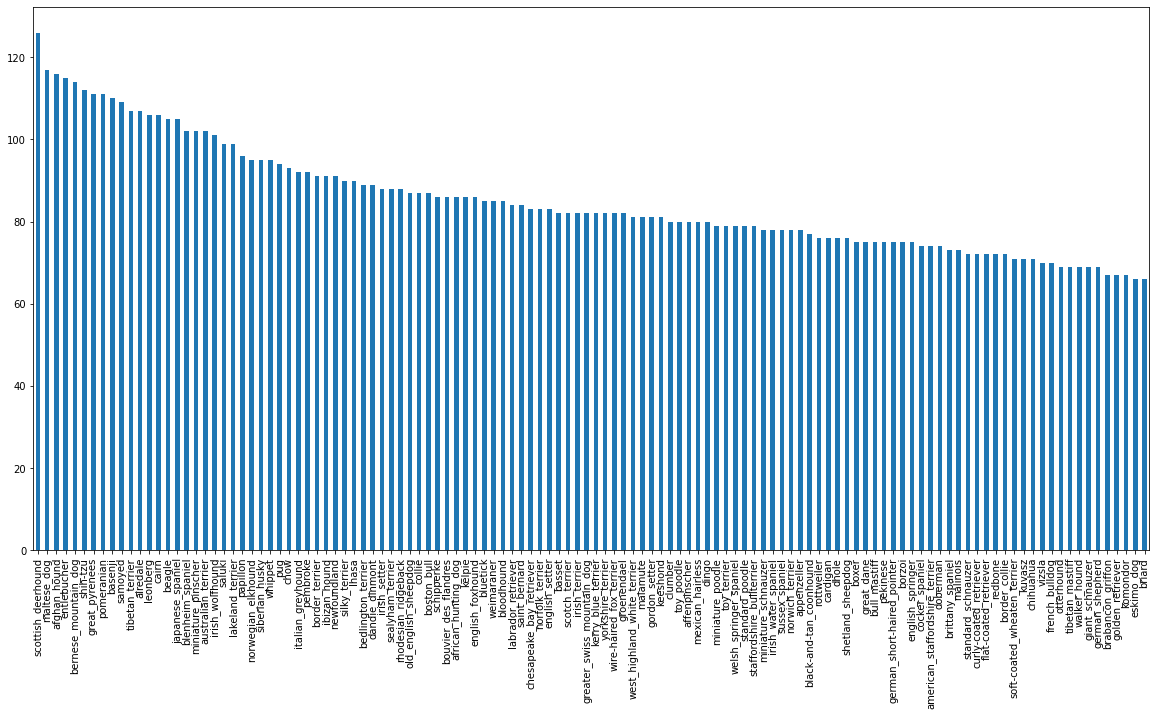

In [42]:
# Visuaize the different breeds that are in our data

labels_csv['breed'].value_counts().plot.bar(figsize=(20, 10));